Lane Detection 

test di detection delle linee, poi selezionate a mano le migliori per test successivi

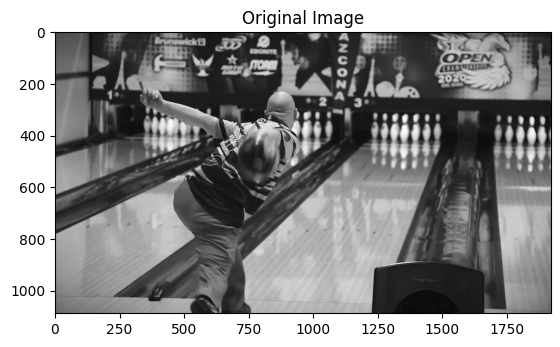

In [1]:
import cv2
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/Users/miche/OneDrive/Documenti/GitHub/bowling-analysis/data/recording_3/frames/frame_3 (10).png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

OTSU THRESHOLD FOR EDGE DETECTION \
good automatic way to find the threshold

Text(0.5, 1.0, 'Canny Edges')

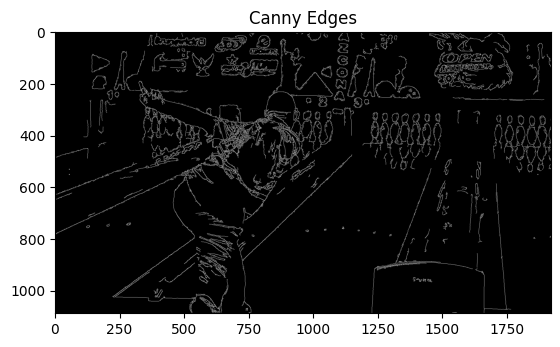

In [2]:
# Compute Otsu's threshold 
otsu_thresh, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Set lower and upper thresholds relative to Otsu's threshold
lower = 0.5 * otsu_thresh
upper = 1.5 * otsu_thresh

edges = cv2.Canny(image, lower, upper)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

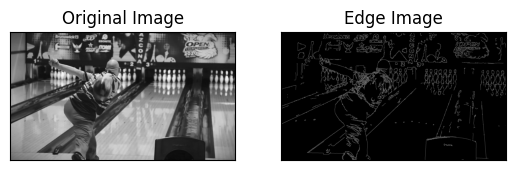

In [3]:
# Display the original image and the edge-detected image
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Line Detection

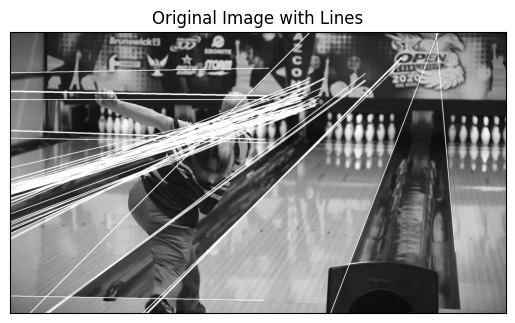

In [4]:
# Use Hough Line Transform to detect lines in the edge-detected image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 180)

image_copy = np.copy(image)
# Draw the lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the original image with detected lines
plt.imshow(image_copy, cmap='gray')
plt.title('Original Image with Lines')
plt.xticks([]), plt.yticks([])
plt.show()

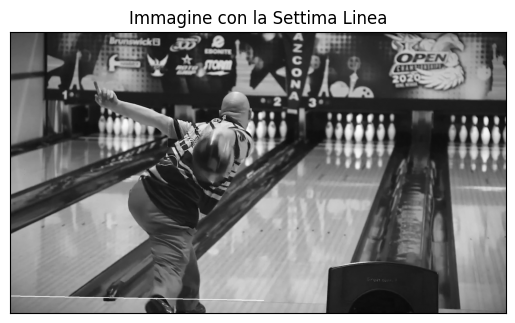

In [5]:
# Seleziona la settima linea
selected_line = lines[42]

# Estrai rho e theta
rho, theta = selected_line[0]

# Calcola i punti di inizio e fine della linea
a = np.cos(theta)
b = np.sin(theta)
x0 = a * rho
y0 = b * rho
x1 = int(x0 + 1000 * (-b))
y1 = int(y0 + 1000 * (a))
x2 = int(x0 - 1000 * (-b))
y2 = int(y0 - 1000 * (a))

# Crea una copia dell'immagine originale
image_with_line = np.copy(image)

# Disegna la linea sull'immagine
cv2.line(image_with_line, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Mostra l'immagine con la linea selezionata
plt.imshow(image_with_line, cmap='gray')
plt.title('Immagine con la Settima Linea')
plt.xticks([]), plt.yticks([])
plt.show()

linee da selezionare:\
sx: 0\
dx: 15\
bottom: 42

In [6]:
left_line = lines[0]
right_line = lines[15]
bottom_line = lines[42]

In [7]:
# # Create a copy of the original image
# image_with_point = np.copy(image)

# # Draw a circle at the point (1300, 500)
# cv2.circle(image_with_point, (446, 407), radius=3, color=(0,0,0), thickness=-1)

# # Display the image with the point
# plt.imshow(image_with_point, cmap='gray')
# plt.title('Immagine con il Punto')
# plt.xticks([]), plt.yticks([])
# plt.show()


Punti per quarta linea:\
(1350,436)\
(446,407)

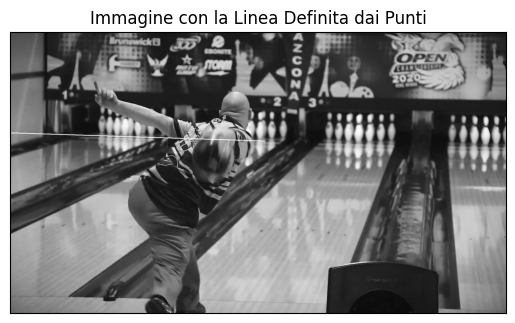

In [8]:
# Definisci i punti
x1, y1 = 1350, 436
x2, y2 = 446, 407

# Calcola i parametri rho e theta
delta_x = x1 - x2
delta_y = y1 - y2
theta = np.arctan2(delta_y, delta_x) + np.pi / 2
rho = x2 * np.cos(theta) + y2 * np.sin(theta)

# Calcola i punti di inizio e fine della linea
a = np.cos(theta)
b = np.sin(theta)
x0 = a * rho
y0 = b * rho
x1_line = int(x0 + 1000 * (-b))
y1_line = int(y0 + 1000 * (a))
x2_line = int(x0 - 1000 * (-b))
y2_line = int(y0 - 1000 * (a))

# Crea una copia dell'immagine originale
image_with_line = np.copy(image)

# Disegna la linea sull'immagine
cv2.line(image_with_line, (x1_line, y1_line), (x2_line, y2_line), (255, 0, 0), 2)

# Mostra l'immagine con la linea
plt.imshow(image_with_line, cmap='gray')
plt.title('Immagine con la Linea Definita dai Punti')
plt.xticks([]), plt.yticks([])
plt.show()

top_line = np.array([[rho, theta]])

In [9]:
print(top_line)
print(bottom_line)
print(left_line)
print(right_line)

[[392.49057306   1.60286498]]
[[1022.           1.5882496]]
[[1.1400000e+03 8.0285144e-01]]
[[1.5490000e+03 3.6651915e-01]]


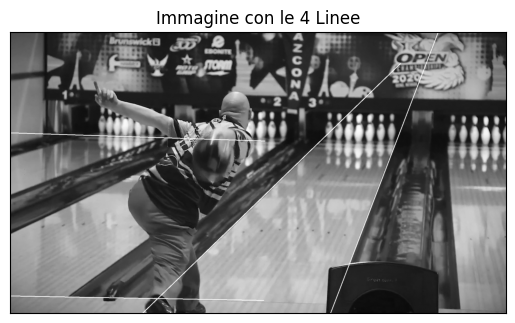

In [10]:
# Crea una copia dell'immagine originale
image_with_all_lines = np.copy(image)

# Funzione per disegnare una linea sull'immagine
def draw_line(image, line, color=(255, 0, 0), thickness=2):
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), color, thickness)

# Disegna le linee sull'immagine
draw_line(image_with_all_lines, top_line)
draw_line(image_with_all_lines, bottom_line)
draw_line(image_with_all_lines, left_line)
draw_line(image_with_all_lines, right_line)

# Mostra l'immagine con tutte le linee
plt.imshow(image_with_all_lines, cmap='gray')
plt.title('Immagine con le 4 Linee')
plt.xticks([]), plt.yticks([])
plt.show()

Esporta le linee in lane_lines.csv

In [11]:
# Definisci il path del file CSV
path_data = '/Users/miche/OneDrive/Documenti/GitHub/bowling-analysis/data/auxiliary_data/lane_lines.csv'

# Crea un array combinato con tutte le linee
lane_lines = np.vstack((top_line, bottom_line, left_line, right_line))

# Salva l'array combinato in un file CSV
np.savetxt(path_data, lane_lines, delimiter=',', header='rho,theta', comments='top,bottom,left,right')